In [ ]:

import pandas as pd


file_path = "Desktop/Jupyter/MP/balancedCTGAN(500).csv"


df = pd.read_csv(file_path)  

print(df.head())

   Transaction_Amount  Transaction_Type  Account_Balance  Device_Type  IP_Address_Flag  Previous_Fraudulent_Activity  Daily_Transaction_Count  Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Type  Transaction_Distance  Authentication_Method  Is_Weekend  Fraud_Label  Year  Month  Day  Hour  Minute  Second
0               39.79                 3         93213.17            0                0                             0                        7                     437.63                            3          0                883.17                      0           0            0  2023      8   14    19      30       0
1                1.19                 1         75725.25            1                0                             0                       13                     478.76                            4          2               2203.36                      3           0            1  2023      6    7     4       1       0
2               28.96                 2    

In [3]:
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67000 entries, 0 to 66999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Amount            67000 non-null  float64
 1   Transaction_Type              67000 non-null  int64  
 2   Account_Balance               67000 non-null  float64
 3   Device_Type                   67000 non-null  int64  
 4   IP_Address_Flag               67000 non-null  int64  
 5   Previous_Fraudulent_Activity  67000 non-null  int64  
 6   Daily_Transaction_Count       67000 non-null  int64  
 7   Avg_Transaction_Amount_7d     67000 non-null  float64
 8   Failed_Transaction_Count_7d   67000 non-null  int64  
 9   Card_Type                     67000 non-null  int64  
 10  Transaction_Distance          67000 non-null  float64
 11  Authentication_Method         67000 non-null  int64  
 12  Is_Weekend                    67000 non-null  int64  
 13  F

In [5]:
!pip install ctgan
!pip install table_evaluator


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   - -------------------------------------- 1.6/43.7 MB 8.3 MB/s eta 0:00:06
   -- ------------------------------------- 3.1/43.7 MB 7.4 MB/s eta 0:00:06
   ---- ----------------------------------- 5.0/43.7 MB 7.7 MB/s eta 0:00:06
   ----- ---------------------------------- 5.5/43.7 MB 6.7 MB/s eta 0:00:06
   ----- ---------------------------------- 6.3/43.7 MB 6.0 MB/s eta 0:00:07
   ------- -------------------------------- 7.9/43.7 MB 6.2 MB/s eta 0:00:06
   ------- -------------------------------- 8.7/43.7 MB 5.9 MB/s eta 0:00:06
   -------- ------------------------------- 9.7/43.7 MB 5.8 MB/s eta 0:00:06
   --------- ------------------------------ 10.5/43.7 MB 5.7 MB/s eta 0:00:06
   ---------- ----------------------------- 11.0/43.7 MB 5.4 MB/s eta 0:00:07
   ---------- ----------------------------- 11.8/43.7 MB 5.1 MB/s eta 0:00:07
   ----------- ---------------------------- 12.3/43.7 MB 4.9 MB/s eta 0:00:07
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
copulas 0.12.1 requires scipy>=1.12.0; python_version >= "3.12" and python_version < "3.13", but you have scipy 1.11.4 which is incompatible.
rdt 1.15.0 requires scipy>=1.12.0; python_version >= "3.12" and python_version < "3.13", but you have scipy 1.11.4 which is incompatible.
sdmetrics 0.19.0 requires scipy>=1.12.0; python_version >= "3.12" and python_version < "3.13", but you have scipy 1.11.4 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


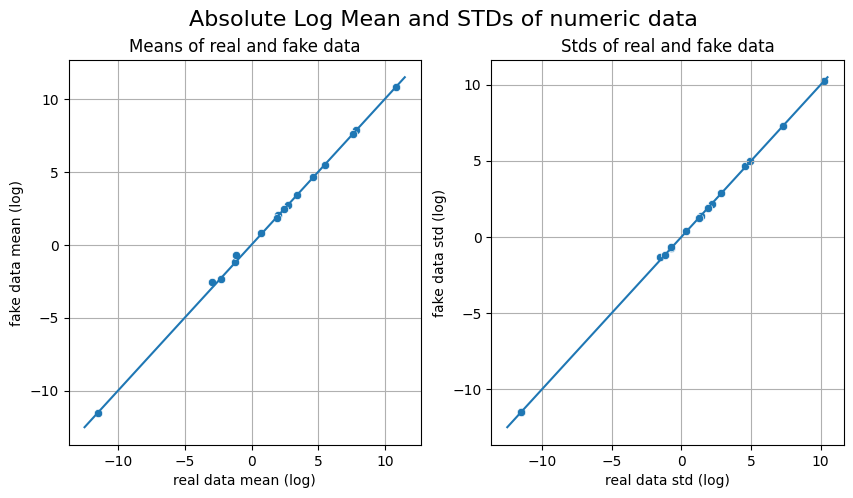

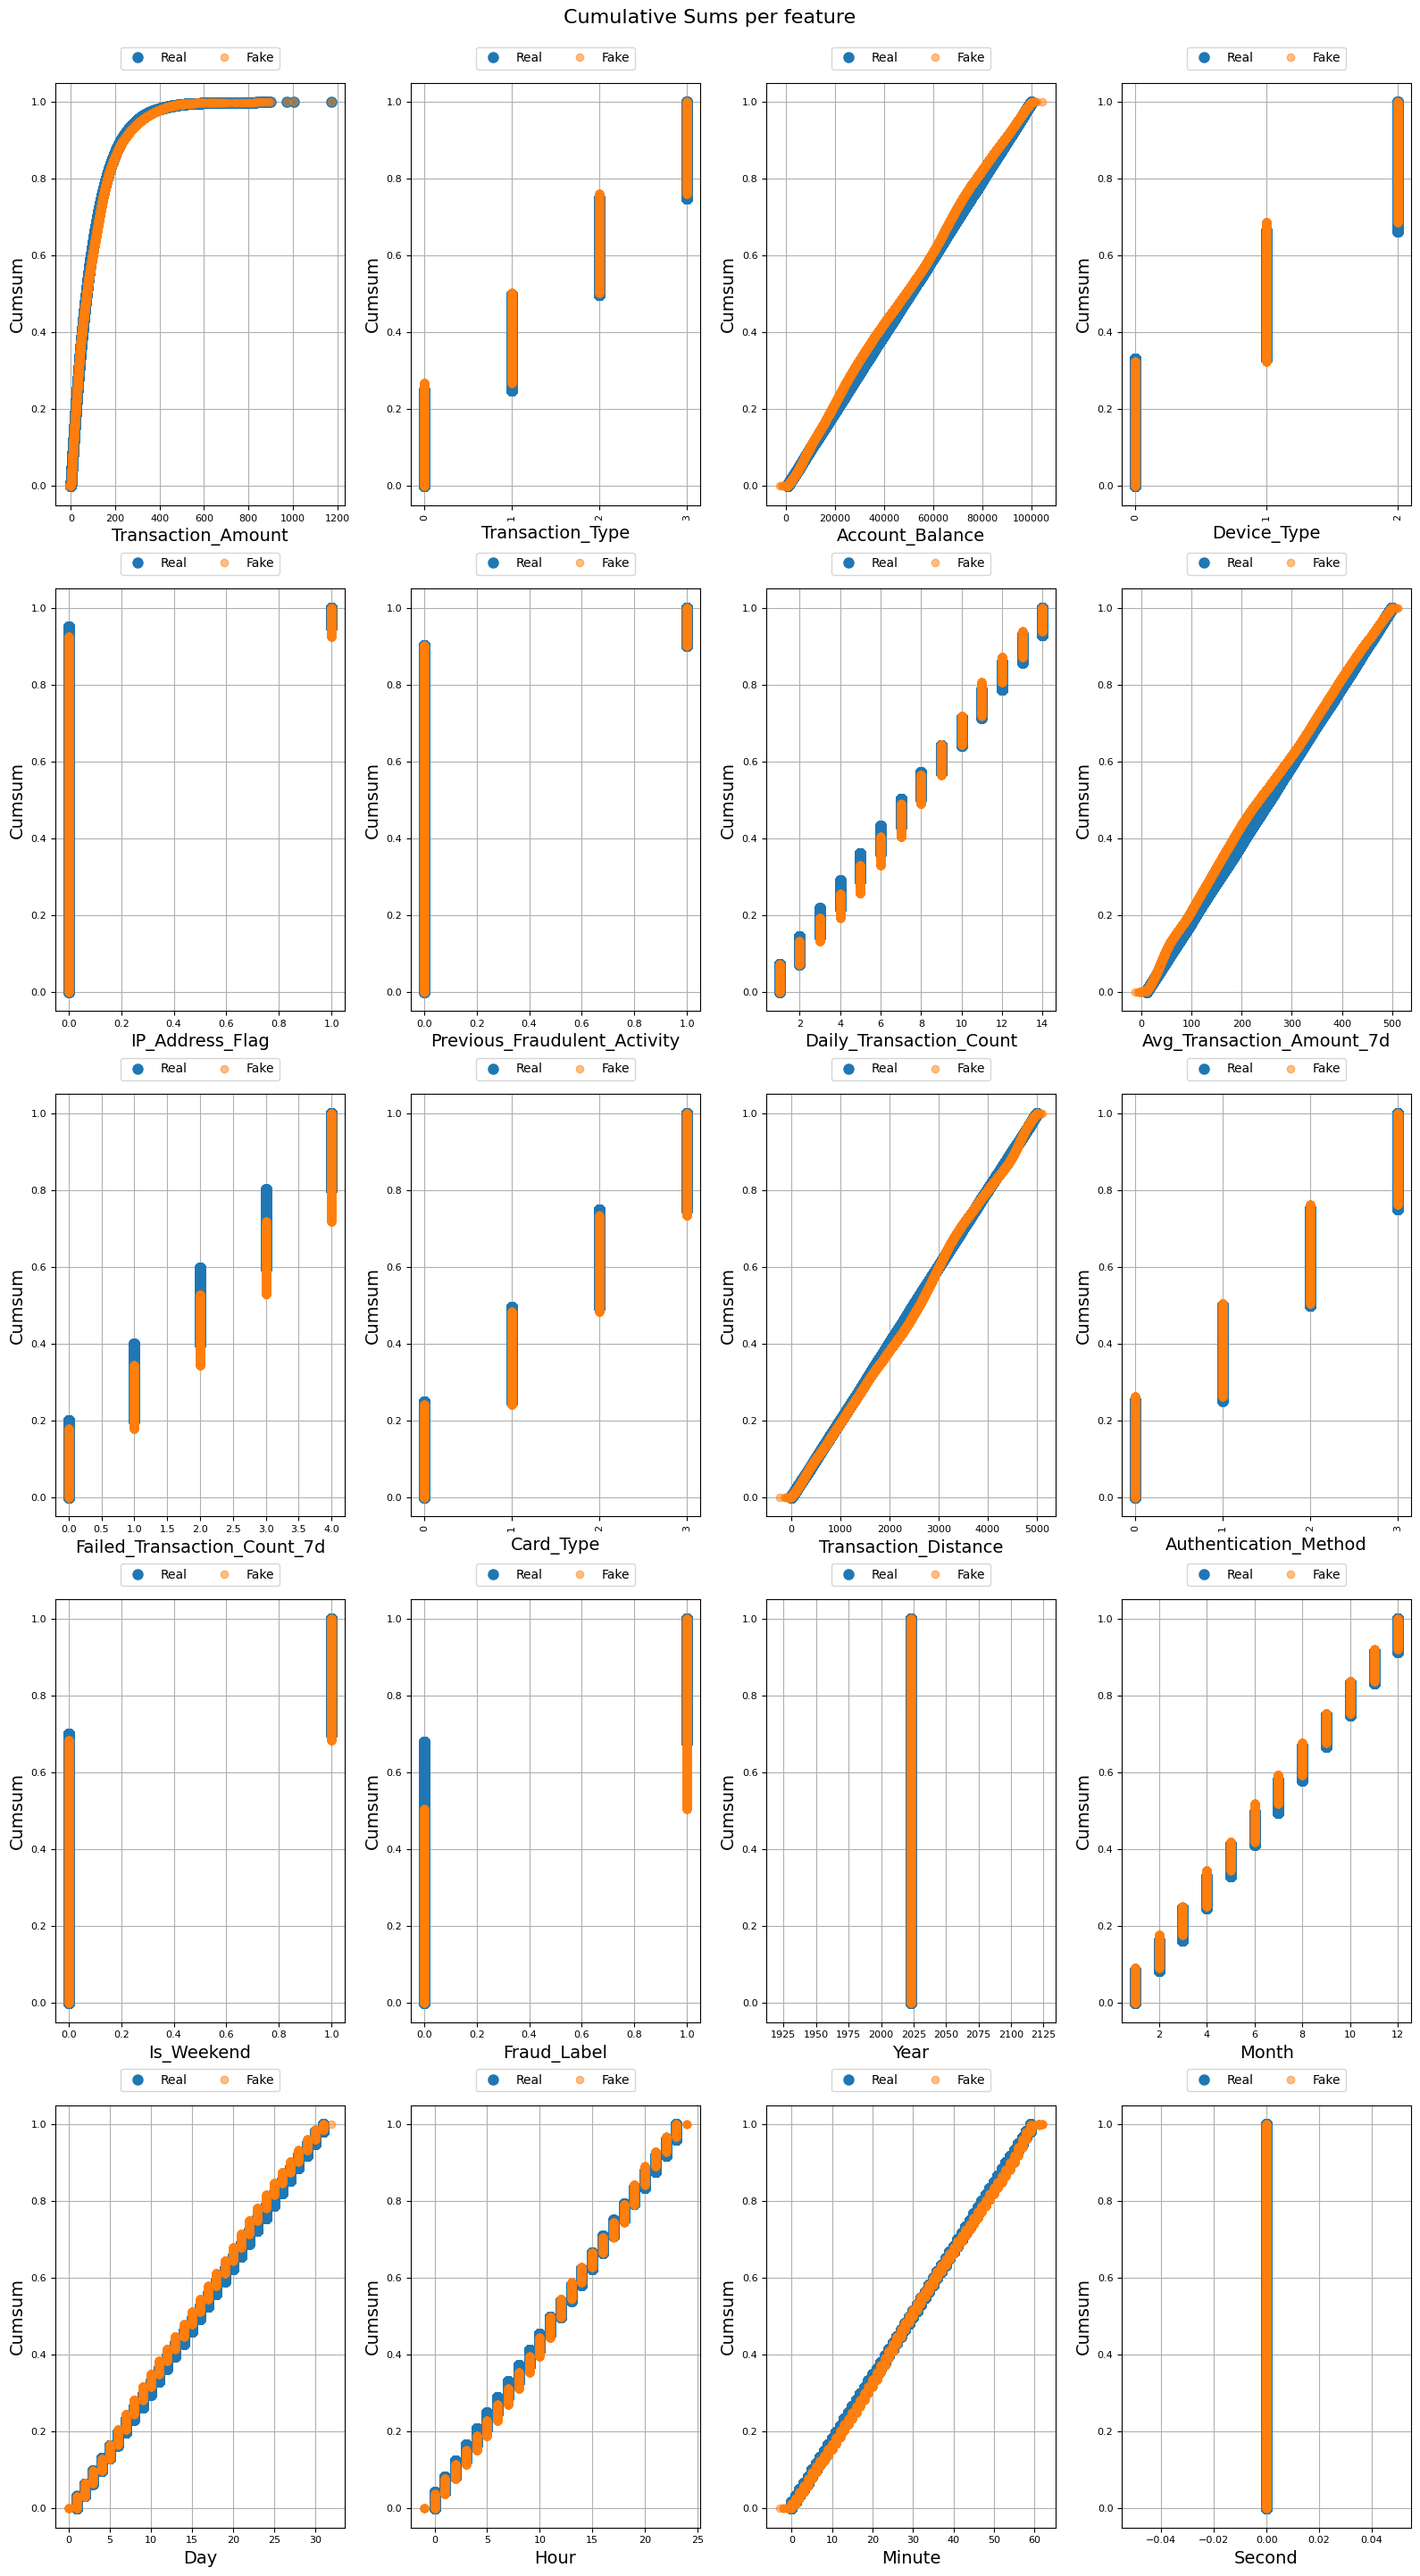

C:\Users\Devendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\table_evaluator\table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\Devendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\table_evaluator\table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\Devendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\table_evaluator\table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\Devendra\AppData\Local\Programs\Python\Python312\Lib

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

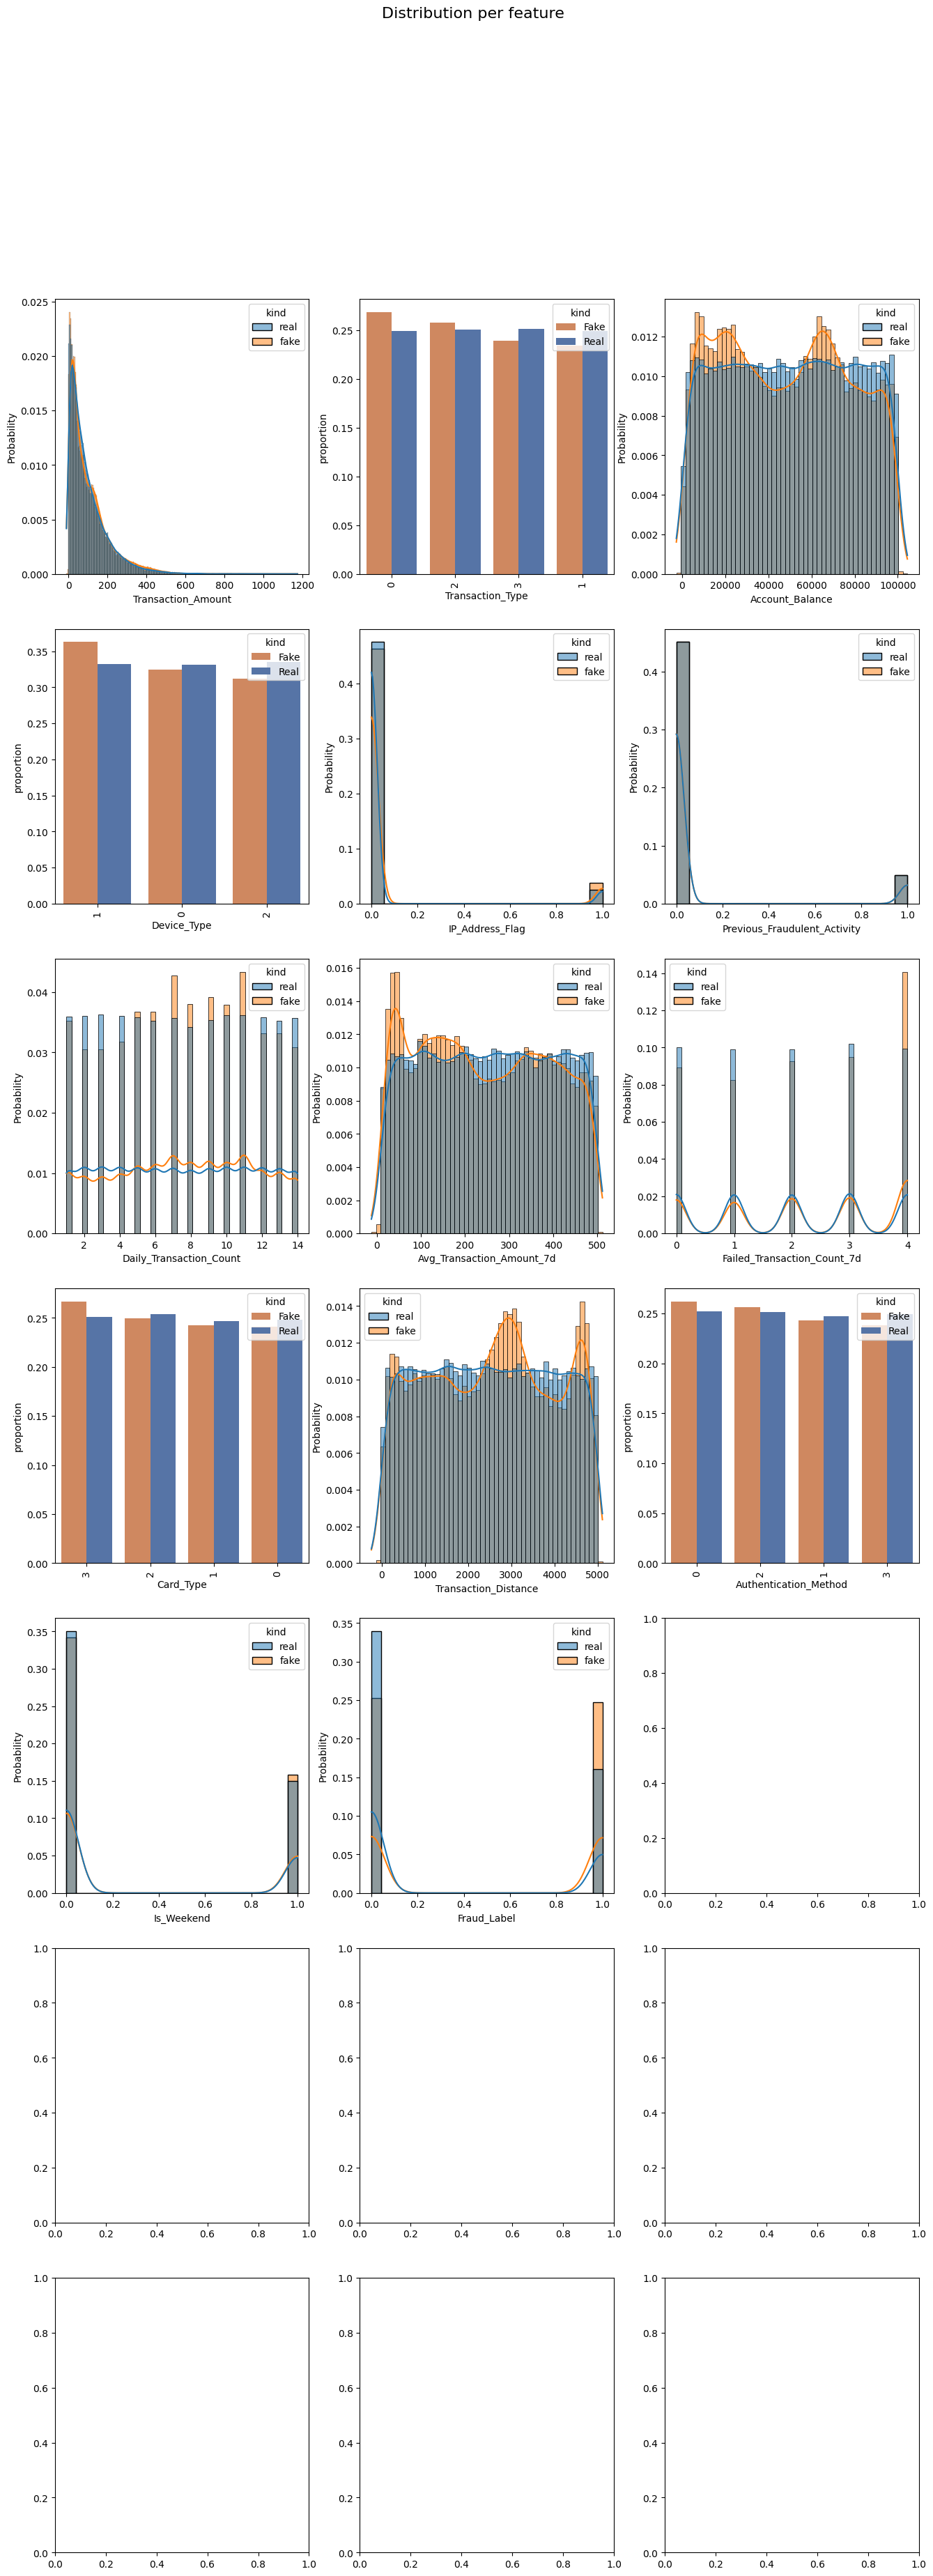

In [9]:
import pandas as pd
from table_evaluator import TableEvaluator

# Load datasets
original_data = pd.read_csv(r"Desktop/Jupyter/MP/processed_fraud_data.csv")
augmented_data = pd.read_csv(r"Desktop/Jupyter/MP/balancedCTGAN(500).csv")

# Define categorical columns
categorical_columns = ['Device_Type', 'Transaction_Type', 'Card_Type', 'Authentication_Method']

# Ensure both datasets have the same number of rows
min_rows = min(len(original_data), len(augmented_data))
original_data_sampled = original_data.sample(n=min_rows, random_state=42)
augmented_data_sampled = augmented_data.sample(n=min_rows, random_state=42)

# Perform table evaluation
table_evaluator = TableEvaluator(original_data_sampled, augmented_data_sampled, cat_cols=categorical_columns)
table_evaluator.visual_evaluation()